<h1 style = "font-size: 60px; color:#ff4d4d; font-family:Brush Script MT, Brush Script Std, cursive;"><center>❤️️ Happy Valentine's Day ❤️️</center></h1>

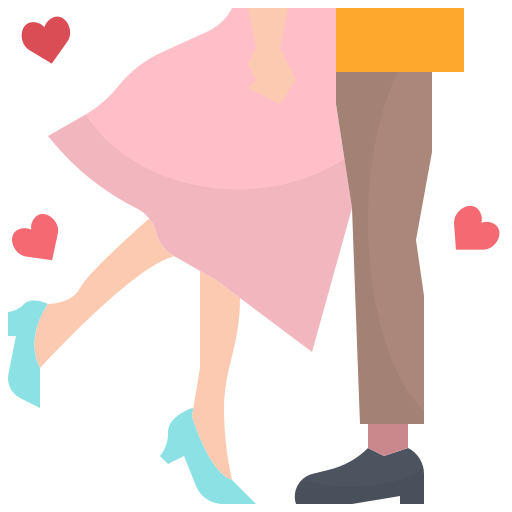

***

<h1 style = "font-size: 40px; color:red; font-family:times new roman; font-style: italic">Overview</h1>

<p style="font-size:20px; color : #800000; font-family:time new roman; line-height: 1.5em">
    Hey love-birds and single-superstars 👋<br>
    First of all, Happy Valentine's Day to everyone ❤️️ Hope you enjoy this day with your loved one to the fullest.<br>
    And for asexuals and singles like me... well.. I think we should go on date with ourselves.. you know.. enjoy the nature, roam like a traveller, enjoy good meal... Fall in love with yourself.
<p style="font-size:20px; color : #800000; font-family:time new roman; line-height: 1.5em">
    Okay so I was searching some datasets to work on my new project and voila! I found these perfect datasets to work on. These are based on this special occassion of Valentine's Day. I got excited to work on this and this is the final result as you can see.<br>
    These datasets allowed me to perform some great visualizations which answer these kind of questions :
</p>
</p>
    <ul style="font-size:20px; color : #800000; font-family:time new roman; line-height: 1.5em">
        <li>What's the amount a person <b>spends</b> on this occasion ?</li>
    <li><b>Men's thoughts</b> vs <b>Women's thoughts</b> ?</li>
        <li>What are the kind of <b>presents</b> the get ?</li>
    </ul>
<p style="font-size:20px; color : #800000; font-family:time new roman; line-height: 1.5em">    
    This <a href = "https://www.kaggle.com/infinator/happy-valentines-day-2022">dataset</a> is from <a href = "https://nrf.com/topics/holiday-and-seasonal-trends/valentines-day/valentines-day-data-center">NRF</a> and <a href = "https://data.world/datasets/valentines-day">Data.World</a><br>
    Time for you to enjoy your ride.
</p>

<h1 style = "font-size: 40px; color:red; font-family:times new roman; font-style: italic">Libraries 📚</h1>

<p style="font-size:20px; color : #800000; font-family:time new roman; line-height: 1.5em">
    <b>Libraries used : </b>Pandas and Plotly.
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import warnings

In [2]:
pio.templates.default = "simple_white"
font_family = "Verdana"
warnings.filterwarnings('ignore')

<h1 style = "font-size: 40px; color:red; font-family:times new roman; font-style: italic">Total Expected Spending in 2022 &#128521</h1>

In [3]:
hstes = pd.read_csv("historical_spending_total_expected_spending.csv")

hstes.rename(columns = {'Unnamed: 0':'Year', "Total Expected Valentine's Day Spending (in billions)" : "Expected Spending (in billion dollars)"}, inplace = True)

hstes = hstes.dropna()

for i in range(len(hstes["Expected Spending (in billion dollars)"])) :
    hstes["Expected Spending (in billion dollars)"].iloc[i] = hstes["Expected Spending (in billion dollars)"].iloc[i][1 : -1]

hstes["Expected Spending (in billion dollars)"] = hstes["Expected Spending (in billion dollars)"].astype(float)

hstes.head()

,Year,Expected Spending (in billion dollars)
0,2009,14.7
1,2010,14.1
2,2011,15.7
3,2012,17.6
4,2013,18.6


In [4]:
fig = px.line(hstes, x="Year", y="Expected Spending (in billion dollars)", markers=True, line_shape='spline')

fig.update_layout(
    title="Spendings in total on Valentine's Day 2009-2022",
    font=dict(
        family=font_family,
        size=18,
        color="#ff4d4d",
    )
)

fig.update_traces(line_color="#ff4da6",
                  selector=dict(type='scatter'),
                  marker=dict(size=12,
                              line=dict(width=2,
                                        color='darkred')),
                 )

fig.show()

<div style="color:white;
            display:fill;
            background-color:#ffb3b3;
            font-family:times new roman;
            font-size:20px;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: #ff4d4d;
              color:#800000;">
        💞 Valentine’s Day spending is expected to reach <b>23.9B dollars</b> this year, up from <b>21.8B dollars</b> in 2021 and the second-highest year on record.
    </p>
</div>

<h1 style = "font-size: 40px; color:red; font-family:times new roman; font-style: italic">Per-Person Expected Spending in 2022 &#128521</h1>

In [5]:
hsaes = pd.read_csv("historical_spending_average_expected_spending.csv")

hsaes.rename(columns = {'Unnamed: 0':'Year', "Per person Expected Valentines Day Spend" : "Expected Avg Spending (in billion dollars)"}, inplace = True)

hsaes = hsaes.dropna()

for i in range(len(hsaes["Expected Avg Spending (in billion dollars)"])) :
    hsaes["Expected Avg Spending (in billion dollars)"].iloc[i] = hsaes["Expected Avg Spending (in billion dollars)"].iloc[i].strip()[1 : -1]

hsaes["Expected Avg Spending (in billion dollars)"] = hsaes["Expected Avg Spending (in billion dollars)"].astype(float)

hsaes

,Year,Expected Avg Spending (in billion dollars)
0,2009,102.5
1,2010,103.0
2,2011,116.2
3,2012,126.0
4,2013,130.9
5,2014,133.9
6,2015,142.3
7,2016,146.8
8,2017,136.5
9,2018,143.5


In [6]:
fig = px.line(hsaes, x="Year", y="Expected Avg Spending (in billion dollars)",
                markers=True, line_shape='spline',
                labels={
                        "Expected Avg Spending (in billion dollars)" : "Avg Spending (in billion $)"
                       }
                )

fig.update_layout(
    title="Per person Spendings",
    font=dict(
        family=font_family,
        size=18,
        color="#ff4d4d",
    )
)

fig.update_traces(line_color="#ff4da6",
                  selector=dict(type='scatter'),
                  marker=dict(size=12,
                              line=dict(width=2,
                                        color='darkred')),
                 )

fig.show()

<div style="color:white;
            display:fill;
            background-color:#ffb3b3;
            font-family:times new roman;
            font-size:20px;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: #ff4d4d;
              color:#800000;">
        💞 According to the survey, shoppers expect to spend an average of <b>\$175.41</b> per person on Valentine’s Day gifts, up from <b>\$164.76</b> in 2021. The increase comes as many intend to spend more on significant others or spouses. 
    </p>
</div>

<h1 style = "font-size: 40px; color:red; font-family:times new roman; font-style: italic">How many people are celebrating ? 🧑‍🤝‍🧑</h1>

In [7]:
hspc = pd.read_csv("historical_spending_percent_celebrating.csv")

hspc.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)

hspc = hspc.dropna()

for i in range(len(hspc["Percent celebrating"])) :
    hspc["Percent celebrating"].iloc[i] = hspc["Percent celebrating"].iloc[i].strip()[0 : 2]

hspc["Percent celebrating"] = hspc["Percent celebrating"].astype(int)

hspc

,Year,Percent celebrating
0,2009,63
1,2010,60
2,2011,58
3,2012,59
4,2013,60
5,2014,54
6,2015,55
7,2016,55
8,2017,54
9,2018,55


In [8]:
fig = px.line(hspc, x="Year", y="Percent celebrating", markers=True, line_shape='spline')

fig.update_layout(
    title="Celebratiion on Valentine's Day",
    font=dict(
        family=font_family,
        size=18,
        color="#ff4d4d",
    )
)

fig.update_traces(line_color="#ff4da6",
                  selector=dict(type='scatter'),
                  marker=dict(size=12,
                              line=dict(width=2,
                                        color='darkred')),
                 )

fig.update_yaxes(type="linear")

fig.show()

<div style="color:white;
            display:fill;
            background-color:#ffb3b3;
            font-family:times new roman;
            font-size:20px;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: #ff4d4d;
              color:#800000;">
        💞 More than half (53 percent) of U.S. consumers plan to celebrate the holiday in 2022, up from 52 percent in 2021. More than three-quarters (76 percent) of those celebrating indicate it is important to do so given the current state of the pandemic.  
    </p>
</div>

<h1 style = "font-size: 40px; color:red; font-family:times new roman; font-style: italic">Presents they buy 💝</h1>

In [9]:
hgtpb = pd.read_csv("historical_gift_trends_percent_buying.csv")

hgtpb.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)

hgtpb = hgtpb.dropna()

for i in range(13) :
    hgtpb["Candy"].iloc[i] = hgtpb["Candy"].iloc[i].strip()[0 : 2]
    hgtpb["Flowers"].iloc[i] = hgtpb["Flowers"].iloc[i].strip()[0 : 2]
    hgtpb["Jewelry"].iloc[i] = hgtpb["Jewelry"].iloc[i].strip()[0 : 2]
    hgtpb["Greeting cards"].iloc[i] = hgtpb["Greeting cards"].iloc[i].strip()[0 : 2]
    hgtpb["An evening out"].iloc[i] = hgtpb["An evening out"].iloc[i].strip()[0 : 2]
    hgtpb["Clothing"].iloc[i] = hgtpb["Clothing"].iloc[i].strip()[0 : 2]
    hgtpb["Gift cards"].iloc[i] = hgtpb["Gift cards"].iloc[i].strip()[0 : 2]

hgtpb

,Year,Candy,Flowers,Jewelry,Greeting cards,An evening out,Clothing,Gift cards
0,2010,47,36,15,55,36,14,11
1,2011,48,34,17,52,35,14,13
2,2012,51,36,19,52,36,15,13
3,2013,51,37,20,55,36,16,15
4,2014,49,37,19,51,37,16,14
5,2015,53,38,21,51,35,16,15
6,2016,50,36,20,48,38,17,15
7,2017,50,35,19,47,37,18,16
8,2018,55,36,19,46,35,17,15
9,2019,52,35,18,44,34,18,15


In [10]:
fig = px.line(hgtpb, x = "Year", y = list(hgtpb.columns[1 : ]),
              markers = True, line_shape = 'spline',
              labels={
                      "value": "Percentage",
                      "variable": "Gift"
                     }
)

fig.update_layout(
    title = "Gift Trends - Types",
    font=dict(
        family = font_family,
        size = 18,
        color = "#ff4d4d",
    )
)

fig.update_traces(
                  selector = dict(type=''),
                  marker = dict(size=6,
                              line = dict(width=2,
                                        color = 'darkred')),
                 )

fig.update_yaxes(type="linear")

fig.show()


<div style="color:white;
            display:fill;
            background-color:#ffb3b3;
            font-family:times new roman;
            font-size:20px;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: #ff4d4d;
              color:#800000;">
        💞 Candy (56 percent), greeting cards (40 percent) and flowers (37 percent) remain the most popular gift items this Valentine’s Day.  
    </p>
</div>

<h1 style = "font-size: 40px; color:red; font-family:times new roman; font-style: italic">Spendings on Presents 💰</h1>

In [11]:
hgttes = pd.read_csv("historical_gift_trends_total_expected_spending.csv")

hgttes.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)

hgttes = hgttes.dropna()

for i in range(len(hgttes["Year"])) :
    hgttes["Candy"].iloc[i] = hgttes["Candy"].iloc[i].strip()[1 : -1]
    hgttes["Flowers"].iloc[i] = hgttes["Flowers"].iloc[i].strip()[1 : -1]
    hgttes["Jewelry"].iloc[i] = hgttes["Jewelry"].iloc[i].strip()[1 : -1]
    hgttes["Greeting cards"].iloc[i] = hgttes["Greeting cards"].iloc[i].strip()[1 : -1]
    hgttes["An evening out"].iloc[i] = hgttes["An evening out"].iloc[i].strip()[1 : -1]
    hgttes["Clothing"].iloc[i] = hgttes["Clothing"].iloc[i].strip()[1 : -1]
    hgttes["Gift cards"].iloc[i] = hgttes["Gift cards"].iloc[i].strip()[1 : -1]
    

hgttes

,Year,Candy,Flowers,Jewelry,Greeting cards,An evening out,Clothing,Gift cards
0,2010,1.2,1.7,3.0,0.8,3.3,1.5,1.2
1,2011,1.5,1.7,3.5,1.1,3.4,1.6,1.5
2,2012,1.5,1.9,4.1,1.0,3.6,1.5,1.2
3,2013,1.7,1.9,4.4,1.2,4.0,1.6,1.5
4,2014,1.4,1.9,3.9,1.0,3.5,1.7,1.2
5,2015,1.7,2.1,4.8,1.0,3.6,2.0,1.5
6,2016,1.8,2.0,4.4,1.1,4.5,2.0,1.7
7,2017,1.7,2.0,4.3,1.0,3.8,1.9,1.4
8,2018,1.8,2.0,4.7,0.9,3.7,1.9,1.5
9,2019,1.8,1.9,3.9,0.9,3.5,2.1,1.3


In [12]:
fig = px.line(hgttes, x = "Year", y = list(hgttes.columns[1 : ]),
              markers = True, line_shape = 'spline',
              labels={
                      "value": "Spendings in Billion $",
                      "variable": "Gift"
                     }
)

fig.update_layout(
    title = "Gift Trends - Total Planning to Spend",
    font=dict(
        family = font_family,
        size = 18,
        color = "#ff4d4d",
    )
)

fig.update_traces(
                  selector = dict(type=''),
                  marker = dict(size=6,
                              line = dict(width=2,
                                        color = 'darkred')),
                 )

fig.update_yaxes(type="linear")

fig.show()


<div style="color:white;
            display:fill;
            background-color:#ffb3b3;
            font-family:times new roman;
            font-size:20px;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: #ff4d4d;
              color:#800000;">
        💞 So for this year (2022), it is expected that the total spending for Jewelry and Evening Date can go more <b>\$6B</b> and <b>\$4B</b> respectively.  
    </p>
</div>

In [13]:
hgtpps = pd.read_csv("historical_gift_trends_per_person_spending.csv")

hgtpps.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)

hgtpps = hgtpps.dropna()

for i in range(len(hgtpps["Year"])) :
    hgtpps["Candy"].iloc[i] = hgtpps["Candy"].iloc[i].strip()[1 : ]
    hgtpps["Flowers"].iloc[i] = hgtpps["Flowers"].iloc[i].strip()[1 : ]
    hgtpps["Jewelry"].iloc[i] = hgtpps["Jewelry"].iloc[i].strip()[1 : ]
    hgtpps["Greeting cards"].iloc[i] = hgtpps["Greeting cards"].iloc[i].strip()[1 : ]
    hgtpps["An evening out"].iloc[i] = hgtpps["An evening out"].iloc[i].strip()[1 : ]
    hgtpps["Clothing"].iloc[i] = hgtpps["Clothing"].iloc[i].strip()[1 : ]
    hgtpps["Gift cards"].iloc[i] = hgtpps["Gift cards"].iloc[i].strip()[1 : ]
    

hgtpps

,Year,Candy,Flowers,Jewelry,Greeting cards,An evening out,Clothing,Gift cards
0,2010,8.60,12.33,21.52,5.91,23.76,10.93,8.42
1,2011,10.75,12.62,26.18,8.09,24.86,12.00,11.21
2,2012,10.85,13.49,29.60,6.93,25.66,10.42,8.43
3,2013,11.64,13.48,30.94,8.32,27.93,11.46,10.23
4,2014,10.80,15.00,30.58,7.97,27.48,13.37,9.00
5,2015,12.70,15.72,36.30,7.87,27.27,14.72,11.05
6,2016,13.11,14.78,33.11,8.52,33.46,15.05,12.52
7,2017,12.68,14.63,32.32,7.36,28.46,13.91,10.23
8,2018,13.12,14.75,34.10,6.55,26.96,14.04,11.04
9,2019,14.12,15.07,30.34,7.31,27.72,16.08,10.31


In [14]:
fig = px.line(hgtpps, x = "Year", y = list(hgtpps.columns[1 : ]),
              markers = True, line_shape = 'spline',
              labels={
                      "value": "Per person spending",
                      "variable": "Gift"
                     }
)

fig.update_layout(
    title = "Gift Trends - Per Person Planning to Spend",
    font=dict(
        family = font_family,
        size = 18,
        color = "#ff4d4d",
    )
)

fig.update_traces(
                  selector = dict(type=''),
                  marker = dict(size=6,
                              line = dict(width=2,
                                        color = 'darkred')),
                 )

fig.update_yaxes(type="linear")

fig.show()

<h1 style = "font-size: 40px; color:red; font-family:times new roman; font-style: italic">How the presents vary within Genders ? 💝</h1>

In [15]:
pgg = pd.read_csv("planned_gifts_gender.csv")

pgg.rename(columns = {'Unnamed: 0':'Gender'}, inplace = True)

pgg = pgg.dropna()

for i in range(len(pgg["Gender"])) :
    pgg["Candy"].iloc[i] = pgg["Candy"].iloc[i].strip()[ : -1]
    pgg["Flowers"].iloc[i] = pgg["Flowers"].iloc[i].strip()[ : -1]
    pgg["Jewelry"].iloc[i] = pgg["Jewelry"].iloc[i].strip()[ : -1]
    pgg["Greeting cards"].iloc[i] = pgg["Greeting cards"].iloc[i].strip()[ : -1]
    pgg["An evening out"].iloc[i] = pgg["An evening out"].iloc[i].strip()[ : -1]
    pgg["Clothing"].iloc[i] = pgg["Clothing"].iloc[i].strip()[ : -1]
    pgg["Gift cards"].iloc[i] = pgg["Gift cards"].iloc[i].strip()[ : -1]

pgg = pgg.T
pgg.rename(columns = {0 : "Men", 1 : "Women"}, inplace = True)
pgg = pgg[1 : ]
pgg

,Men,Women
Candy,52,59
Flowers,56,19
Jewelry,30,14
Greeting cards,37,43
An evening out,33,29
Clothing,20,24
Gift cards,18,24


In [16]:
fig = px.histogram(pgg, x=pgg.index, y=list(pgg.columns),
             barmode='group',
             height=400,
             labels={
                      "variable" : "Gender",
                      "index" : "Gift"
                    },
             color_discrete_map={"Men" : "#86add9", "Women" : "#ff6666"}
)

fig.update_layout(
    title = "Gifts they buy",
    font=dict(
        family = font_family,
        size = 14,
        color = "#ff4d4d",
    )
)

fig.show()

<div style="color:white;
            display:fill;
            background-color:#ffb3b3;
            font-family:times new roman;
            font-size:20px;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: #ff4d4d;
              color:#800000;">
        💞 Despite the ongoing impact of the omicron variant, consumers are feeling much more comfortable with activities like going out than they were a year ago. And that shows in their Valentine’s Day plans.
    </p>
</div>

<h1 style = "font-size: 40px; color:red; font-family:times new roman; font-style: italic">How the Presents vary with Age ? 👩‍❤️‍👨</h1>

In [17]:
pga = pd.read_csv("planned_gifts_age.csv")

pga.rename(columns = {'Unnamed: 0':'Gender'}, inplace = True)

pga = pga.dropna()

for i in range(len(pga["Gender"])) :
    pga["Candy"].iloc[i] = pga["Candy"].iloc[i].strip()[ : -1]
    pga["Flowers"].iloc[i] = pga["Flowers"].iloc[i].strip()[ : -1]
    pga["Jewelry"].iloc[i] = pga["Jewelry"].iloc[i].strip()[ : -1]
    pga["Greeting cards"].iloc[i] = pga["Greeting cards"].iloc[i].strip()[ : -1]
    pga["An evening out"].iloc[i] = pga["An evening out"].iloc[i].strip()[ : -1]
    pga["Clothing"].iloc[i] = pga["Clothing"].iloc[i].strip()[ : -1]
    pga["Gift cards"].iloc[i] = pga["Gift cards"].iloc[i].strip()[ : -1]

pga = pga.T
pga.rename(columns = {0 : pga[0][0], 1 : pga[1][0], 2 : pga[2][0], 3 : pga[3][0], 4 : pga[4][0], 5 : pga[5][0]}, inplace = True)
pga = pga[1 : ]
pga

,18-24,25-34,35-44,45-54,55-64,65+
Candy,70,62,58,60,50,42
Flowers,50,44,41,37,32,25
Jewelry,33,34,29,20,13,8
Greeting cards,33,33,42,42,43,44
An evening out,41,37,30,31,29,24
Clothing,33,27,26,20,19,12
Gift cards,23,19,22,23,20,20


In [18]:
fig = px.histogram(pga, x=pga.index, y=list(pga.columns),
             barmode='group',
             height=400,
             labels={
                      "variable" : "Age group",
                      "sum of value" : "Gift percentage",
                      "index" : "Gift"
                    },
             color_discrete_map={
                                 "18-24" : "#e6004c",
                                 "25-34" : "#ff1a1a",
                                 "35-44" : "#ff4d4d",
                                 "45-54" : "#ff704d",
                                 "55-64" : "#ff9999",
                                 "65+" : "pink"
                                }
)

fig.update_layout(
    title = "Gifts different age groups buy",
    font=dict(
        family = font_family,
        size = 14,
        color = "#ff4d4d",
    )
)

fig.show()


<div style="color:white;
            display:fill;
            background-color:#ffb3b3;
            font-family:times new roman;
            font-size:20px;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: #ff4d4d;
              color:#800000;">
        💞 The elderly people are more likely to give Greeting Cards as compared to Candies.
    </p>
</div>

<h1 style = "font-size: 40px; color:red; font-family:times new roman; font-style: italic">Who are not Celebrating ?</h1>

In [19]:
ncg1 = pd.read_csv("spending_or_celebrating_gender_1.csv", index_col='Unnamed: 0')
ncg1.rename(columns = {"Gender" : "Not celebrating but spending quality time"}, inplace = True)
ncg1.iloc[0][0] = 27
ncg1.iloc[1][0] = 27
ncg1

,Not celebrating but spending quality time
Men,27
Women,27


In [20]:
fig = make_subplots(rows=1, cols=1,
                    specs=[[{'type':'domain'}]],
                   )

fig.add_trace(go.Pie(labels = ["Celebrating", "Not celebrating but still partying", "Not celebrating"],
                     values = [53, 27, 20],
                     pull=[0, 0.05]
                    ))

fig.update_traces(marker=dict(colors=["#ff6666", '#d9d9d9', "#94b88f"]))

fig.update_layout(
    font=dict(
        family = font_family,
        size = 14,
        color = "#555955",
    )
)

fig.show()

<h1 style = "font-size: 40px; color:#555955; font-family:times new roman; font-style: italic">So how the non-valentine people are celebrating ?</h1>

In [21]:
ncg2 = pd.read_csv("spending_or_celebrating_gender_2.csv", index_col="Unnamed: 0")
for i in range(len(ncg2.index)) :
    ncg2["Men"].iloc[i] = ncg2["Men"].iloc[i].strip()[ : -1]
    ncg2["Women"].iloc[i] = ncg2["Women"].iloc[i].strip()[ : -1]
ncg2

,Men,Women
"Purchase ""anti-Valentine's Day"" gifts",3,2
Treat yourself,11,16
Plan a get-together,10,8


In [22]:
fig = make_subplots(rows=1, cols=3,
                    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=["Anti-Valen. Day gift", "Self treat", "Party"]
                   ) 

fig.add_trace(go.Pie(labels = ncg2.columns,
                     values = list(ncg2.iloc[0]),
                     name="Anti-Valentine's Day Gift", pull=[0, 0.05]
                    ),
1, 1)

fig.add_trace(go.Pie(labels = ncg2.columns,
                     values = list(ncg2.iloc[1]),
                     name="Self treat", pull=[0, 0.05]
                    ),
1, 2)

fig.add_trace(go.Pie(labels = ncg2.columns,
                     values = list(ncg2.iloc[2]),
                     name="Party", pull=[0, 0.05]
                    ),
1, 3)

fig.update_traces(marker=dict(colors=["#dd9", '#94b88f']))

fig.update_layout(
    font=dict(
        family = font_family,
        size = 14,
        color = "#555955",
    )
)


fig.show()

<h1 style = "font-size: 40px; color:#555955; font-family:times new roman; font-style: italic">Non-Valentines and their Age</h1>

In [23]:
nca1 = pd.read_csv("spending_or_celebrating_age_1.csv", index_col="Unnamed: 0")

nca1.rename(columns = {'Age':'Not Celebrating %'}, inplace=True)

for i in range(len(nca1["Not Celebrating %"])) :
    nca1["Not Celebrating %"].iloc[i] = nca1["Not Celebrating %"].iloc[i][:-1]

nca1

,Not Celebrating %
18-24,51
25-34,40
35-44,31
45-54,19
55-64,18
65+,13


In [24]:
fig = px.histogram(nca1, x=nca1.index, y=nca1["Not Celebrating %"],
                    labels={
                            "index" : "Age group",
                            "sum of Not Celebrating %" : "Not celebrating percentage"
                           })

fig.update_traces(marker_color=["#94b88f", "#94b88f", '#dd9', '#dd9', '#dd9', '#dd9'])

fig.update_layout(
    title = "Not celebrating the Valentine's Day but spending quality time",
    font=dict(
        family = font_family,
        size = 14,
        color = "#555955",
    )
)

fig.show()

<h1 style = "font-size: 40px; color:#555955; font-family:times new roman; font-style: italic">Activities of Non-Valentines and their Age</h1>

In [25]:
nca2 = pd.read_csv("spending_or_celebrating_age_2.csv", index_col="Unnamed: 0")
for i in range(len(nca2.index)) :
    nca2["18-24"].iloc[i] = nca2["18-24"].iloc[i][ : -1]
    nca2["25-34"].iloc[i] = nca2["25-34"].iloc[i][ : -1]
    nca2["35-44"].iloc[i] = nca2["35-44"].iloc[i][ : -1]
    nca2["45-54"].iloc[i] = nca2["45-54"].iloc[i][ : -1]
    nca2["55-64"].iloc[i] = nca2["55-64"].iloc[i][ : -1]
    nca2["65+"].iloc[i] = nca2["65+"].iloc[i][ : -1]
nca2

,18-24,25-34,35-44,45-54,55-64,65+
"Purchase ""anti-Valentine's Day"" gifts",5,4,5,3,0,0
Treat yourself,29,24,16,7,8,4
Plan a get-together,22,14,8,5,5,4


In [26]:
fig = px.histogram(nca2, x=nca2.index, y=list(nca2.columns),
             barmode='group',
             height=400,
             labels={
                      "variable" : "Age group",
                      "sum of value" : "Gift percentage",
                      "index" : "Gift"
                    },
             color_discrete_map={
                                 "18-24" : "#339933",
                                 "25-34" : "#40bf40",
                                 "35-44" : "#66cc66",
                                 "45-54" : "#8cd98c",
                                 "55-64" : "#53c68c",
                                 "65+" : "#79d2a6"
                                }
)

fig.update_layout(
    font=dict(
        family = font_family,
        size = 14,
        color = "#555955",
    )
)

fig.show()

<h1 style = "font-size: 40px; color:red; font-family:times new roman; font-style: italic">What's the point of Valentine's Day ? 🤯</h1>

In [27]:
!pip3 install openpyxl

In [28]:
point_df = pd.read_excel("Valentines Day.xlsx", index_col="Point")

for i in range(len(point_df["Men"])) :
    point_df["Men"].iloc[i] *= 100
    point_df["Women"].iloc[i] *= 100

point_df 

,Men,Women
Point,,
Show how much you care,29.0,51.0
Sex,25.0,8.0
To go out for dinner,18.0,6.0
To impress someone,14.0,3.0
To receive gifts from someone,7.0,6.0
To treat yourself,4.0,14.0
To buy someone gifts,3.0,12.0


In [29]:
fig = px.histogram(point_df, y=point_df.index, x=list(point_df.columns),
             barmode='group',
             labels={
                      "variable" : "Gender",
                    },
             color_discrete_map={"Men" : "#86add9", "Women" : "#ff6666"}
)

fig.update_layout(
    font=dict(
        family = font_family,
        size = 16,
        color = "black",
    )
)

fig.show()


<div style="color:white;
            display:fill;
            background-color:#ffb3b3;
            font-family:times new roman;
            font-size:20px;
            line-height : 1.7em">
    <p style="padding: 10px;
              border-style : solid;
              border-width: thin;
              border-color: #ff4d4d;
              color:#800000;">
        💞 When it comes to buying gift for their loved ones, men become Mr. Beast. When it comes to showing how much they care, women become godesses.<br>And when it comes to sex, umm.. I think the graph is wrong.<br>
        Jokes apart, the conclusion is Men are highly likely to consider sex and eating out as the main point of Valentine's Day.
    </p>
</div>

<p  style="font-size:20px; color : #800000; font-family:time new roman; line-height: 1.5em">
    Thanks for checking out my notebook.<br>
    Hope you enjoyed 💜<br>
    Again, a very very happy valentine's day.
</p>